In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


%matplotlib inline

In [3]:
path = 'data/swat_newdataset/SWaT.A3_dataset_Jul 19_labelled.xlsx'

df = pd.read_excel(path, skiprows=[0, 2])
df

,GMT +0,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T04:30:00Z,benign,0,0.000000,729.865800,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
1,2019-07-20T04:30:01Z,benign,0,0.000000,729.434000,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20T04:30:02.004013Z,benign,0,0.000000,729.120000,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20T04:30:03.004013Z,benign,0,0.000000,728.688200,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20T04:30:04Z,benign,0,0.000000,727.706900,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,2019-07-20T08:39:55.001007Z,benign,0,4.200429,491.169769,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14992,2019-07-20T08:39:56.0050048Z,benign,0,4.253915,491.405273,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14993,2019-07-20T08:39:57.0050048Z,benign,0,4.303558,492.308100,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14994,2019-07-20T08:39:58.0050048Z,benign,0,4.323736,492.465100,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


In [4]:
df.columns

Index(['GMT +0', 'Attack', 'Label', 'FIT 101', 'LIT 101', 'MV 101', 'P1_STATE',
       'P101 Status', 'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203',
       'FIT 201', 'LS 201', 'LS 202', 'LSL 203', 'LSLL 203', 'MV201',
       'P2_STATE', 'P201 Status', 'P202 Status', 'P203 Status', 'P204 Status',
       'P205 Status', 'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301',
       'AIT 302', 'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301',
       'MV 302', 'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status',
       'AIT 401', 'AIT 402', 'FIT 401', 'LIT 401', 'LS 401', 'P4_STATE',
       'P401 Status', 'P402 Status', 'P403 Status', 'P404 Status', 'UV401',
       'AIT 501', 'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502',
       'FIT 503', 'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504',
       'P5_STATE', 'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502',
       'PIT 503', 'FIT 601', 'LSH 601', 'LSH 602', 'LSH 603', 'LSL 601',
       'LSL 602', 'LSL 603', 'P6 STA

Function to preprocess the data using StandardScaler

In [5]:
def preprocess_data(data):
    """
    Prepare SWAT dataset for adversarial attacks
    """
    # Drop timestamp column and separate features/labels
    X = data.drop(['GMT +0', 'Attack', 'Label'], axis=1)
    y = data['Label']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test, scaler, X.columns

FGSM (Fast Gradient Sign Method) function which apply the formula on data

In [6]:
def fgsm_attack(data, epsilon, gradient):
    """Performs a Fast Gradient Sign Method attack."""
    return data + epsilon * np.sign(gradient)

In [7]:
def fast_gradient_sign_method(model, X, eps=0.3):
    """
    Implementation of FGSM attack
    Based on the gradient-based attacks discussed in the slides
    """
    X_perturbed = X.copy()
    probs = model.predict_proba(X)

    for i in range(X.shape[0]):
        # predicted class
        target = np.argmax(probs[i])

        # compute gradient using finite differences
        grad = np.zeros(X.shape[1])
        for j in range(X.shape[1]):
            X_temp = X[i].copy()
            X_temp[j] += eps
            prob_plus = model.predict_proba(X_temp.reshape(1, -1))[0][target]

            X_temp = X[i].copy()
            X_temp[j] -= eps
            prob_minus = model.predict_proba(X_temp.reshape(1, -1))[0][target]

            grad[j] = (prob_plus - prob_minus) / (2 * eps)

        # apply perturbation
        X_perturbed[i] = fgsm_attack(X_perturbed[i], eps, grad)

    return X_perturbed

# MLPClassifier & FGSM

In [8]:
def map_df_num(df: pd.DataFrame) -> pd.DataFrame:
    new_df = df.applymap(lambda x: 1 if isinstance(x, str) and "inactive" in x.lower()
                 else 0 if isinstance(x, str) and "active" in x.lower()
                 else x).copy()

    return new_df

### Data preprocessing

In [9]:
df = map_df_num(df)
X_train, X_test, y_train, y_test, scaler, feature_names = preprocess_data(df)

/tmp/ipykernel_328889/1147833406.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = df.applymap(lambda x: 1 if isinstance(x, str) and "inactive" in x.lower()


In [10]:
model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=300,
    random_state=42
)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [11]:
X_perturbed = fast_gradient_sign_method(model, X_test)

## Analysis

Showing the perturbation per features, to show columns more likely to be attacked

In [12]:
# retrieve feature perturbation
mean_perturbation = np.mean(np.abs(X_perturbed - X_test), axis=0)

perturbation_dict = dict(zip(feature_names, mean_perturbation))

# Sort the dictionary by perturbations
sorted_perturbations = dict(sorted(perturbation_dict.items(), key=lambda x: x[1]))

sorted_features = list(sorted_perturbations.keys())
sorted_values = list(sorted_perturbations.values())

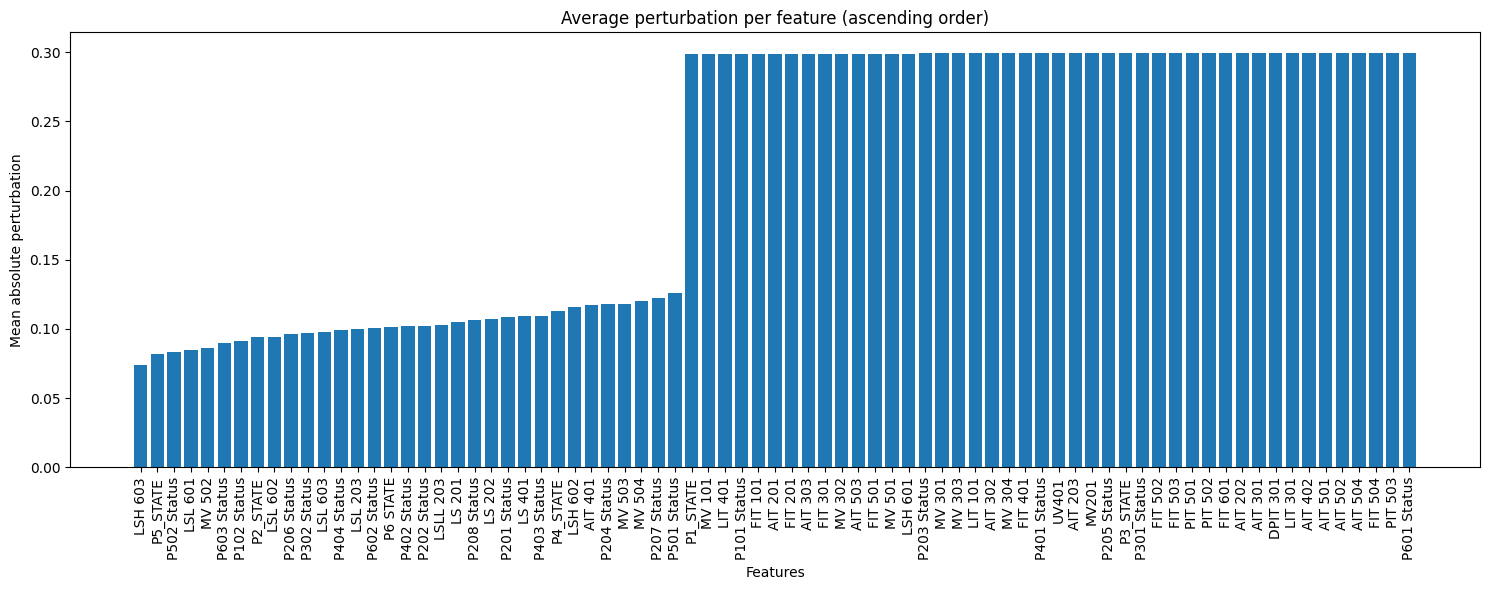

In [13]:
plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_features)), sorted_values)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.title('Average perturbation per feature (ascending order)')
plt.xlabel('Features')
plt.ylabel('Mean absolute perturbation')
plt.tight_layout()
plt.show()

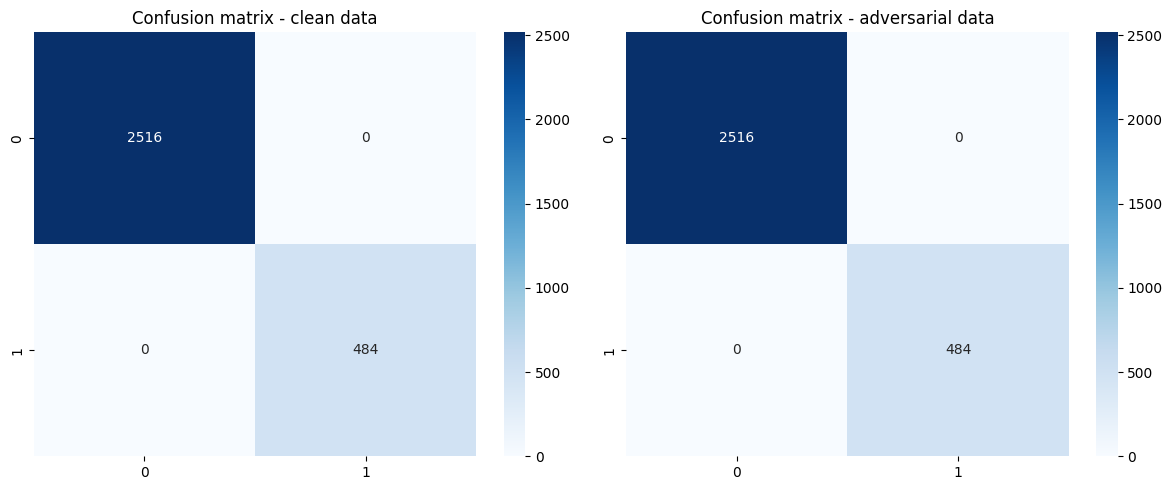

In [14]:
y_pred_clean = model.predict(X_test)
y_pred_perturbed = model.predict(X_perturbed)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm_clean = confusion_matrix(y_test, y_pred_clean)
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - clean data')

plt.subplot(1, 2, 2)
cm_perturbed = confusion_matrix(y_test, y_pred_perturbed)
sns.heatmap(cm_perturbed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - adversarial data')

plt.tight_layout()
plt.show()

In [15]:
print("Reducing dimensions to 2 using PCA for visualization.")
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

Reducing dimensions to 2 using PCA for visualization.


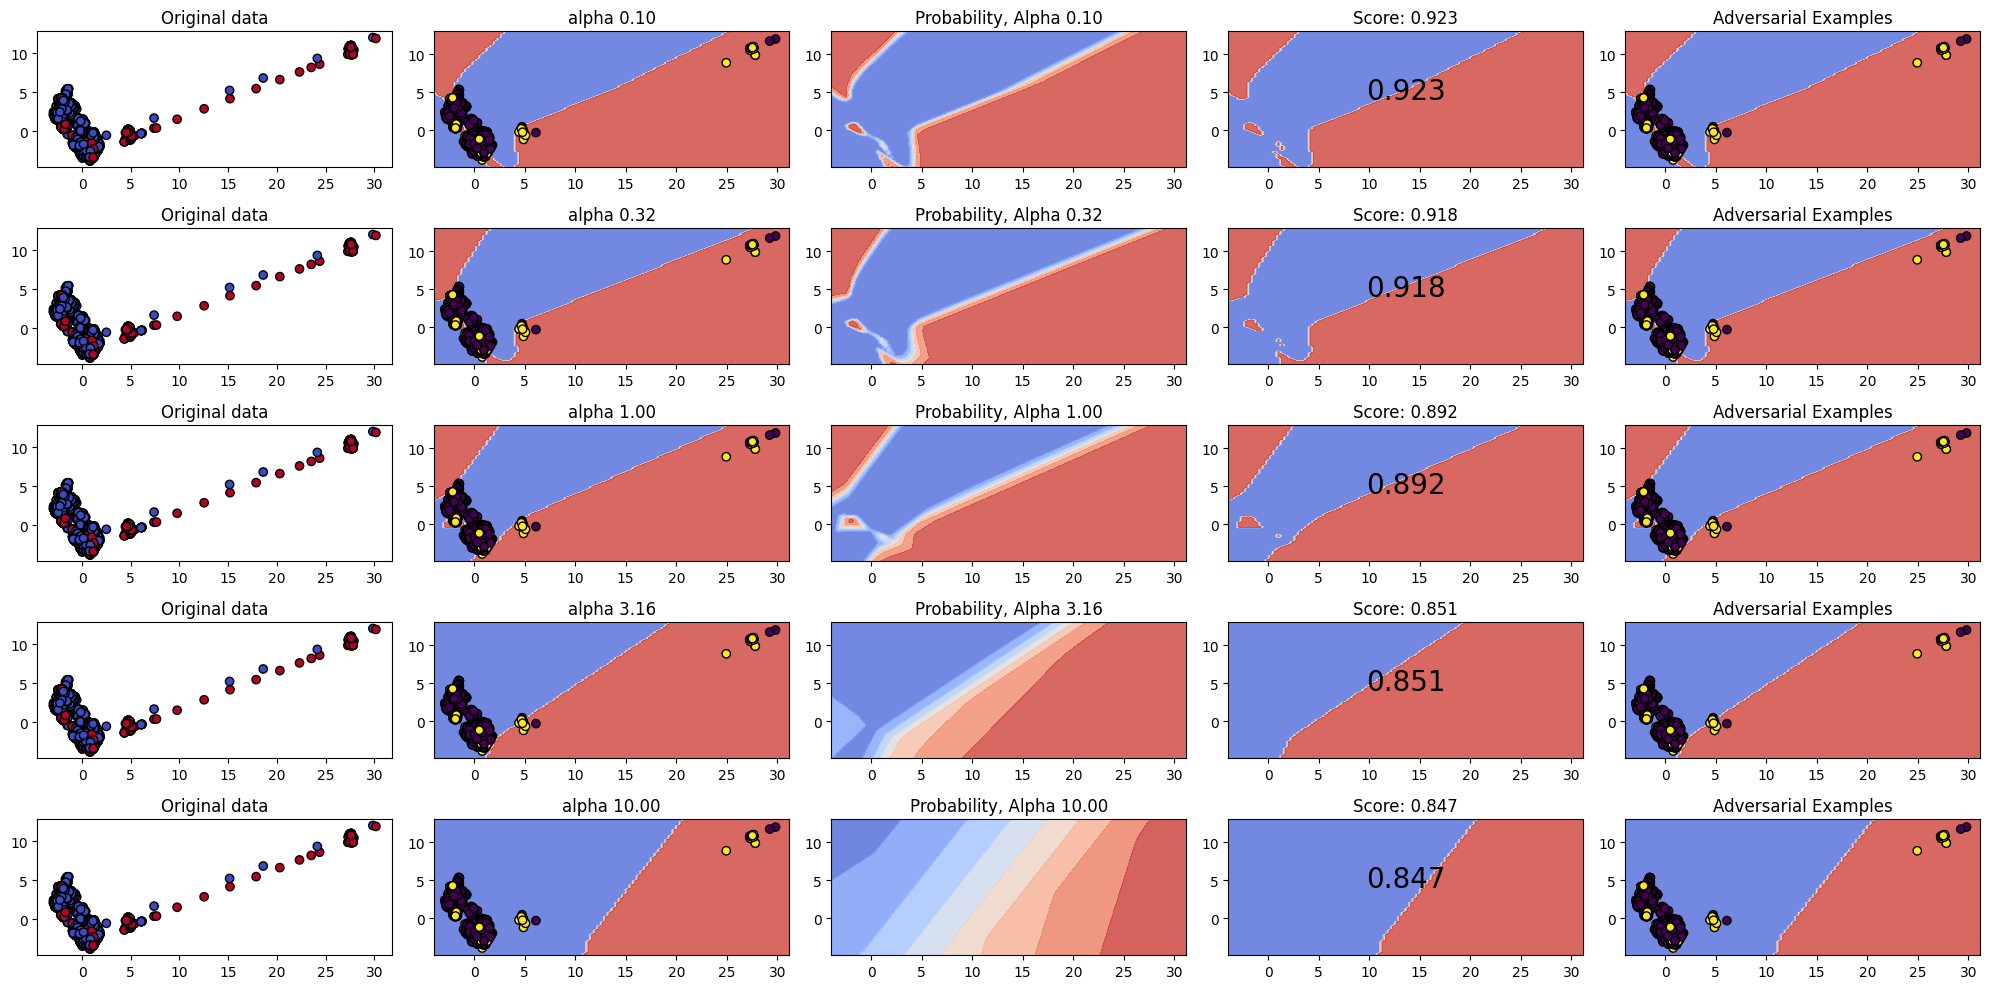

In [16]:
alphas = [0.1, 0.32, 1.0, 3.16, 10.0]

# subplots for display purpose
fig, axes = plt.subplots(len(alphas), 5, figsize=(20, 10))

for i, alpha in enumerate(alphas):
    # mlp training
    clf = MLPClassifier(
        alpha=alpha,
        hidden_layer_sizes=(100, 50),
        max_iter=300,
        random_state=42
    )
    clf.fit(X_train_2d, y_train)

    # 2D mesh grid -> plotting decision boundaries
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100
    ))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # display original data
    ax = axes[i, 0]
    ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title('Original data')

    # display decision boundary
    ax = axes[i, 1]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', marker='o')
    ax.set_title(f'alpha {alpha:.2f}')

    # display decision regions
    ax = axes[i, 2]
    prob = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    ax.contourf(xx, yy, prob.reshape(xx.shape), alpha=0.8, cmap=plt.cm.coolwarm)
    ax.set_title(f'Probability, Alpha {alpha:.2f}')

    # display decision margins
    ax = axes[i, 3]
    score = clf.score(X_test_2d, y_test)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.text(0.5, 0.5, f'{score:.3f}', fontsize=20, ha='center', transform=ax.transAxes)
    ax.set_title(f'Score: {score:.3f}')

    # test with feature perturbations
    ax = axes[i, 4]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', marker='o')
    ax.set_title('Adversarial Examples')

plt.tight_layout()
plt.show()

# RandomForestClassifier & FGSM

Let's prepare the data again and encode the labels

In [21]:
data = df.copy()

# labels encoding
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

X_train, X_test, y_train, y_test, scaler, features = preprocess_data(data)

As you saw in the title, we are going to train a random forest classifier

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Analysis

In [23]:
y_pred = clf.predict(X_test)
clean_accuracy = accuracy_score(y_test, y_pred)
print(f"Clean accuracy: {clean_accuracy:.2f}")

Clean accuracy: 1.00


Now, we are going to add perturbations inside the input data and see how the model predictions react

In [24]:
epsilon = 0.1
gradients = X_test - X_train.mean(axis=0)  # Simplified gradient
X_test_adv = fgsm_attack(X_test, epsilon, gradients)

Let's evaluate the adversarial accuracy

In [25]:
y_pred_adv = clf.predict(X_test_adv)
adversarial_accuracy = accuracy_score(y_test, y_pred_adv)
print(f"Adversarial accuracy: {adversarial_accuracy:.2f}")

Adversarial accuracy: 0.98


We can see that the model isn't as efficient as before in its predictions.

**A better visualization is given by:**

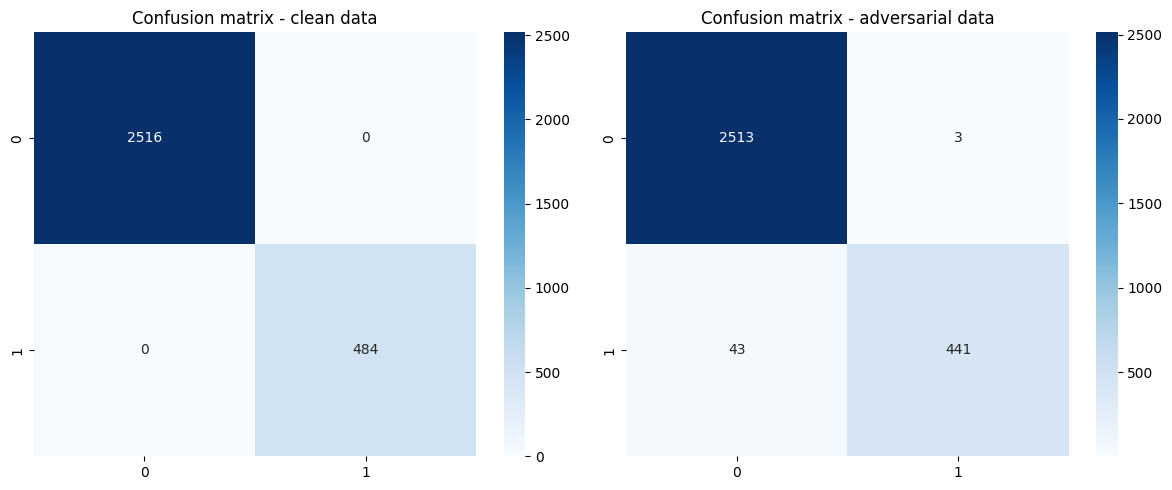

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_clean = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - clean data')

plt.subplot(1, 2, 2)
cm_perturbed = confusion_matrix(y_test, y_pred_adv)
sns.heatmap(cm_perturbed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - adversarial data')

plt.tight_layout()
plt.show()

Let's analyze the feature importance in the prediction (modifications on those labels can highly disturb our model predictions)

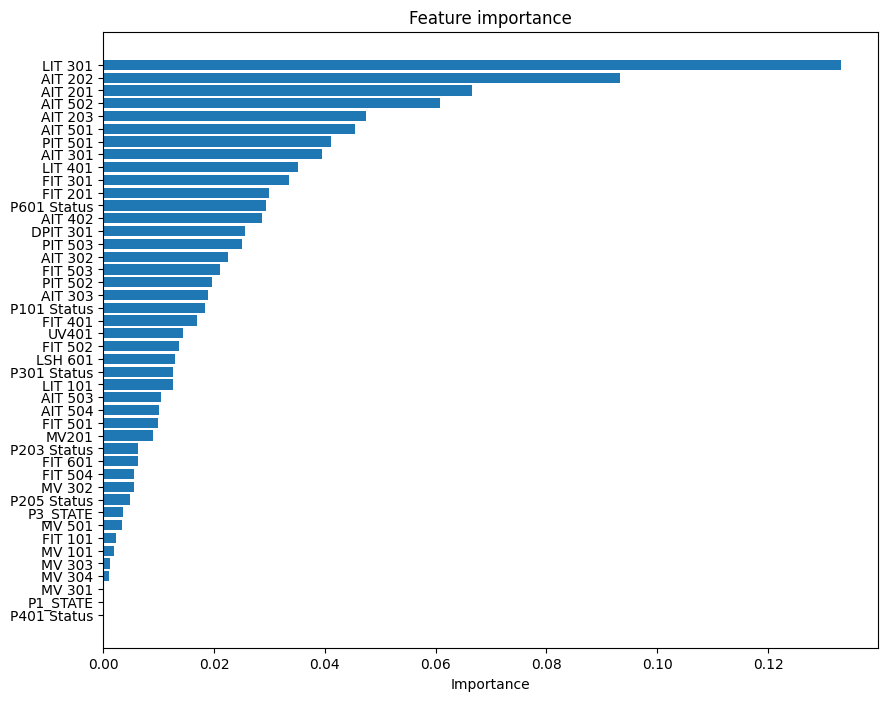

In [27]:
feature_importance = clf.feature_importances_

# filter out features with 0 importance
non_zero_idx = feature_importance > 0

sorted_idx = np.argsort(feature_importance[non_zero_idx])
plt.figure(figsize=(10, 8))
plt.barh(range(len(features[non_zero_idx])), feature_importance[non_zero_idx][sorted_idx], align='center')
plt.yticks(np.arange(len(features[non_zero_idx])), features[non_zero_idx][sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.show()

To go further, we can compute and display the minimal required pertubation to disturb the model predictions.

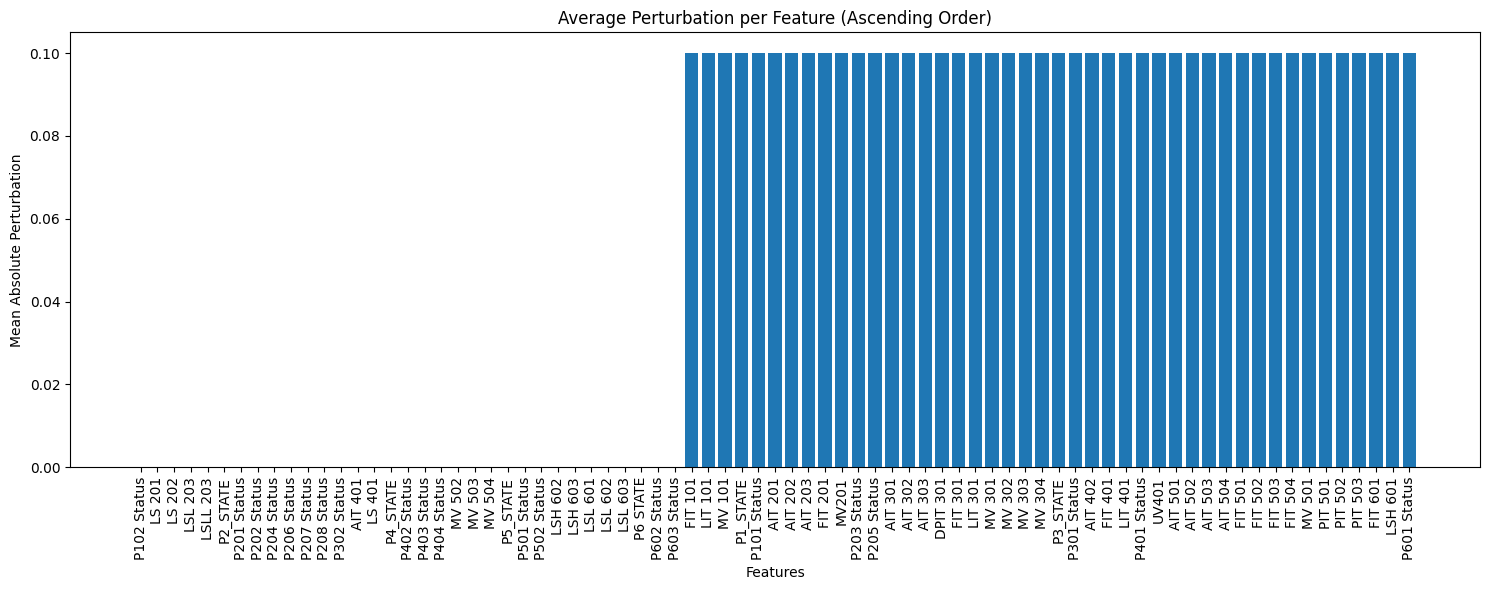

In [17]:
mean_perturbation = np.mean(np.abs(X_test_adv - X_test), axis=0)

# Create a dictionary of feature names and their perturbations
perturbation_dict = dict(zip(feature_names, mean_perturbation))

# Sort the dictionary by values (perturbations) in ascending order
sorted_perturbations = dict(sorted(perturbation_dict.items(), key=lambda x: x[1]))

# Extract sorted feature names and perturbation values
sorted_features = list(sorted_perturbations.keys())
sorted_values = list(sorted_perturbations.values())

plt.figure(figsize=(15, 6))
plt.bar(range(len(sorted_features)), sorted_values)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.title('Average Perturbation per Feature (Ascending Order)')
plt.xlabel('Features')
plt.ylabel('Mean Absolute Perturbation')
plt.tight_layout()
plt.show()

Reducing dimensions to 2 using PCA for visualization.


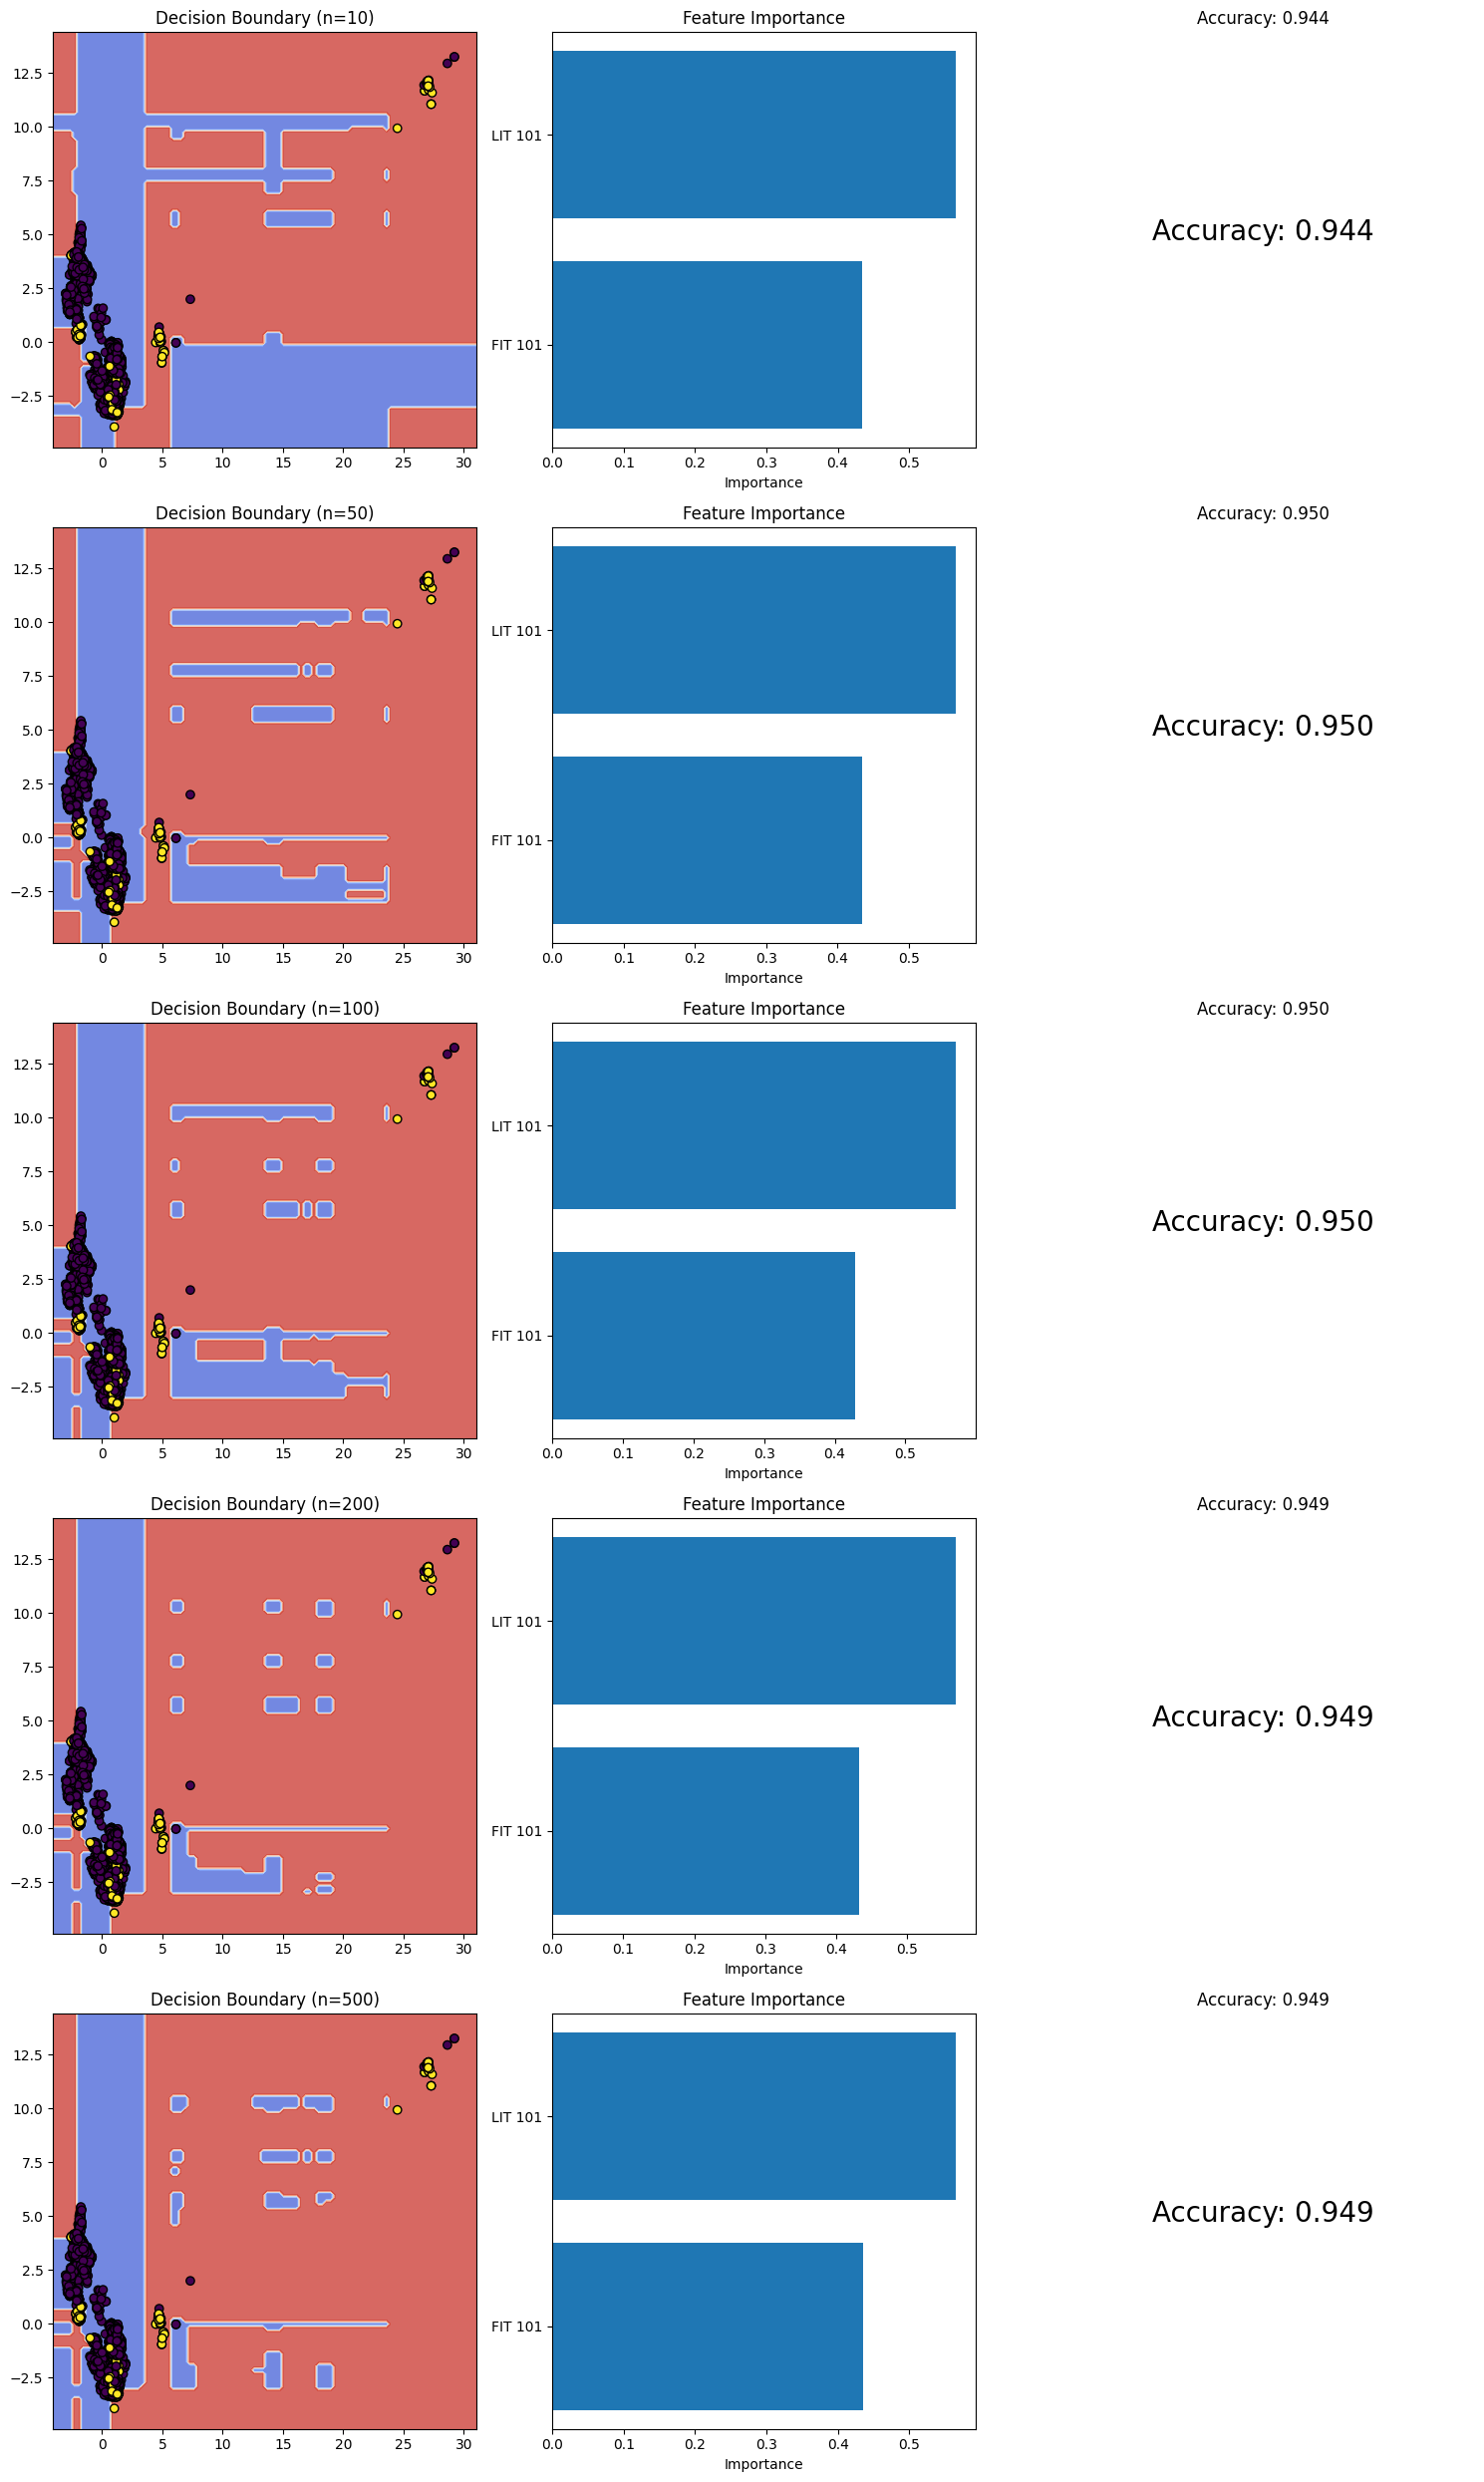

In [18]:
n_estimators_list = [10, 50, 100, 200, 500]

# Check if dimensionality is greater than 2, and reduce dimensions if needed
if X_train.shape[1] > 2:
    print("Reducing dimensions to 2 using PCA for visualization.")
    pca = PCA(n_components=2, random_state=42)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)
else:
    X_train_2d, X_test_2d = X_train, X_test

# Create a grid of subplots
fig, axes = plt.subplots(len(n_estimators_list), 3, figsize=(15, len(n_estimators_list) * 5))

for i, n_estimators in enumerate(n_estimators_list):
    # Train a classifier for each number of estimators
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train_2d, y_train)

    # Create mesh grid for plotting decision boundaries
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax = axes[i, 0]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', marker='o')
    ax.set_title(f'Decision Boundary (n={n_estimators})')

    # Plot feature importance (for first row only)
    feature_importance = clf.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    ax = axes[i, 1]
    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels(np.array(X.columns)[sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

    # Evaluate clean accuracy
    score = clf.score(X_test_2d, y_test)
    ax = axes[i, 2]
    ax.text(0.5, 0.5, f'Accuracy: {score:.3f}', fontsize=20, ha='center', transform=ax.transAxes)
    ax.set_title(f'Accuracy: {score:.3f}')
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()